In [24]:
import numpy as np 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.utils import to_categorical
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

In [25]:
np.random.seed(42)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
batch_size = 32
nb_epoch = 40
img_rows, img_cols = 32, 32
img_channels = 3
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
sgd = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, validation_split=0.1, shuffle=True,verbose=1)
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Epoch 1/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 40ms/step - accuracy: 0.3700 - loss: 1.7194 - val_accuracy: 0.4526 - val_loss: 1.4921
Epoch 2/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.4988 - loss: 1.3799 - val_accuracy: 0.5642 - val_loss: 1.2283
Epoch 3/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.5608 - loss: 1.2158 - val_accuracy: 0.5974 - val_loss: 1.1324
Epoch 4/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.6082 - loss: 1.0927 - val_accuracy: 0.6566 - val_loss: 0.9753
Epoch 5/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.6388 - loss: 1.0166 - val_accuracy: 0.6768 - val_loss: 0.8935
Epoch 6/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.6614 - loss: 0.9527 - val_accuracy: 0.6576 - val_loss: 0.9629
Epoch 7/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.6810 - loss: 0.8998 - val_accuracy: 0.7092 - val_loss: 0.8248
Epoch 8/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 55s 39ms/step - accuracy: 0.6989 -

In [26]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.weights.h5")
json_file = open("cifar10_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("cifar10_model.weights.h5")
loaded_model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
scores = loaded_model.evaluate(X_test, Y_test, verbose=1)
print("Точность модели на тестовых данных: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8147 - loss: 0.5700
Точность модели на тестовых данных: 81.47%


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


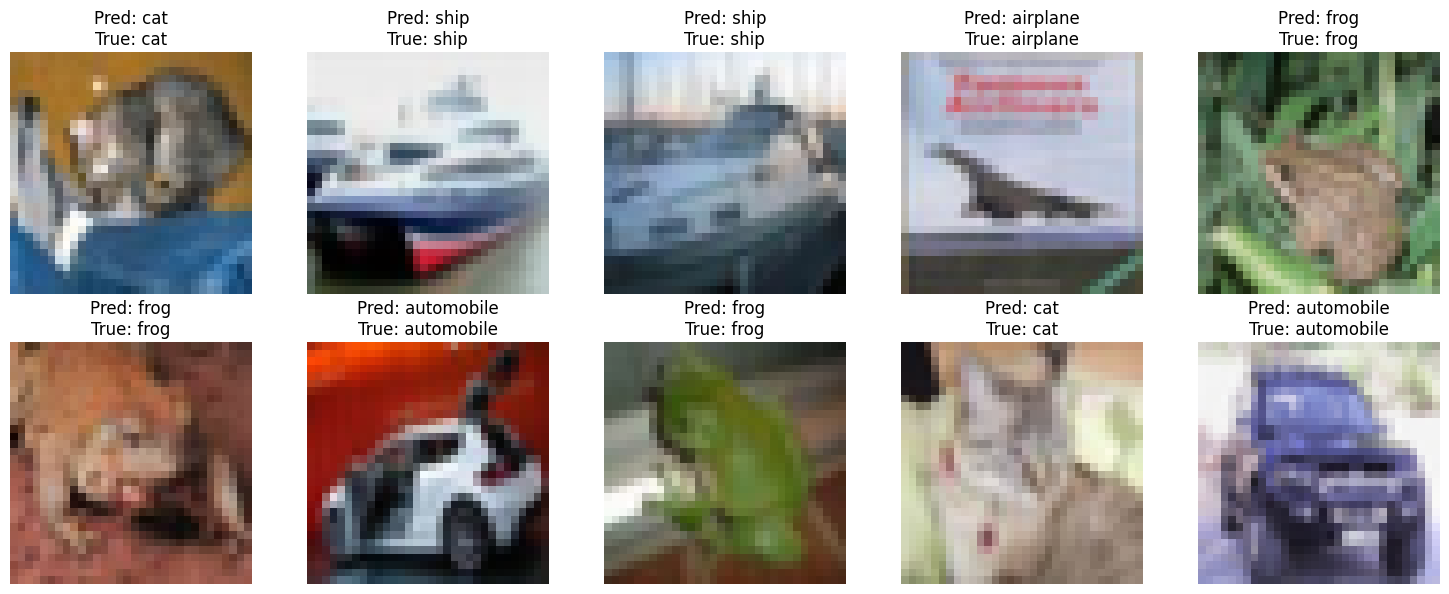

In [28]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = loaded_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_true[i]]}")
plt.tight_layout()
plt.show()


In [29]:
from keras.preprocessing import image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
automobile
[[2.1118326e-03 8.9424175e-01 1.7149188e-04 3.4080617e-06 1.0702737e-03
  1.0068434e-07 8.2551882e-02 2.2734566e-06 2.4958156e-04 1.9597493e-02]]


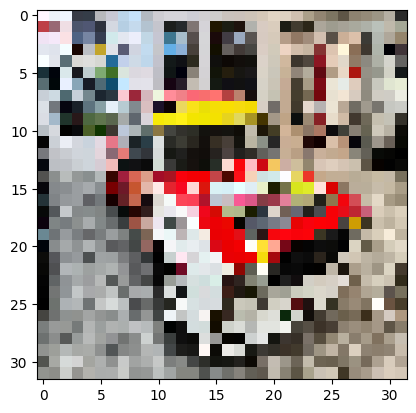

In [32]:

img_path = 'mycar.jpg'
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = 255 - x
x /= 255
x = np.expand_dims(x, axis=0)
prediction = loaded_model.predict(x)
plt.imshow(img)
print(class_names[np.argmax(prediction)])
print(prediction)